In [40]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt 
from scipy.io import loadmat
import os 
import os.path as op

## Acquisition time visualization

In [85]:
dic_ast = {
    'subject':['AST01', 'AST02', 'AST03', 'AST05', 'AST06', 'AST07'],
    't1':[200, 194, 204, 206, 177, 183],
    't2':[213, 207, 215, 220, 188, 195],
    't3':[np.nan, 241, 249, np.nan, 233, 230],
    't4':[400, 414, 434, 452, 404, 394]
}

dic_ctl = {
    'subject':['CTL01', 'CTL02', 'CTL03', 'CTL04', 'CTL05', 'CTL06', 'CTL07', 'CTL08'],
    't1':[132, 126, 178, 218, 185, 104, 191, 183],
    't2':[216, 216, 269, 319, 275, 203, 281, 275],
    't3':[321, 322, 407, 410, 387, 287, 386, 380]
}
df_ast = pd.DataFrame(dic_ast)
df_ctl = pd.DataFrame(dic_ctl)

df_ast = pd.melt(
    df_ast, 
    id_vars='subject', 
    value_vars=['t1', 't2', 't3', 't4'], 
    var_name='tp', 
    value_name='days'
)

df_ctl = pd.melt(
    df_ctl, 
    id_vars='subject', 
    value_vars=['t1', 't2', 't3'], 
    var_name='tp', 
    value_name='days'
)

<AxesSubplot: xlabel='days', ylabel='tp'>

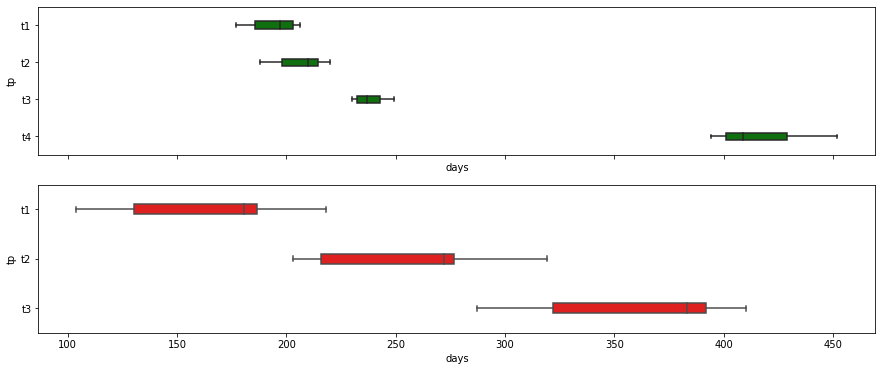

In [40]:
f, a = plt.subplots(2,1, figsize=(15,6), sharex=True)
sns.boxplot(x='days', y='tp', data=df_ast, color='green', width=0.2, ax=a[0])

sns.boxplot(x='days', y='tp', data=df_ctl, color='red', width=0.2, ax=a[1])

## Ventricles CSF Volume

In [98]:
seg_dir = '/Users/sepehrmortaheb/MyDrive/LEIA/Projects/BRAIN-DTI/Astronauts-VBM/results/segmentation/ready_for_python'

atlas = 'neuromorphometrics'

fnames = os.listdir(seg_dir)
fnames = [f for f in fnames if f.endswith(f'{atlas}.mat')]

df = pd.DataFrame([])

for f in fnames: 
    subj = f.split('_')[1].split('-')[1]
    
    if subj.startswith('con'):
        group = 'control'
    elif subj.startswith('ast'):
        group = 'astronaut'
    
    sess = f.split('_')[2].split('-')[1]
    
    if sess == 'postflight':
        sess = 'postflight1'
        
    if sess == 'preflight':
        dsess = 0
    elif sess == 'postflight1':
        dsess = np.nanmedian(df_ast[df_ast.tp=='t1']['days'])
    elif sess == 'postflight2':
        dsess = np.nanmedian(df_ast[df_ast.tp=='t2']['days'])
    elif sess == 'postflight3':
        dsess = np.nanmedian(df_ast[df_ast.tp=='t3']['days'])
    elif sess == 'followup':
        dsess = np.nanmedian(df_ast[df_ast.tp=='t4']['days'])
    elif sess == '1':
        dsess = 0
    elif sess == '2':
        dsess = np.nanmedian(df_ctl[df_ctl.tp=='t1']['days'])
    elif sess == '3':
        dsess = np.nanmedian(df_ctl[df_ctl.tp=='t2']['days'])
    elif sess == '4':
        dsess = np.nanmedian(df_ctl[df_ctl.tp=='t3']['days'])
    
    a = loadmat(op.join(seg_dir, f))
    
    for r in range(len(a['Rnames'])):
        rname = a['Rnames'][r][0][0]
        vcsf = a['RVcsf'][r][0]
        
        tmpdf = pd.DataFrame([])
        
        tmpdf['subject'] = [subj]
        tmpdf['group'] = [group]
        tmpdf['session'] = [sess]
        tmpdf['region'] = [rname]
        tmpdf['volume'] = [vcsf]
        tmpdf['dsession'] = [dsess]
        
        df = pd.concat((df, tmpdf), ignore_index=True)
        
df

,subject,group,session,region,volume,dsession
0,controlA,control,4,3rd Ventricle,0.806680,383.0
1,controlA,control,4,4th Ventricle,0.950515,383.0
2,controlA,control,4,Right Accumbens Area,0.004545,383.0
3,controlA,control,4,Left Accumbens Area,0.000263,383.0
4,controlA,control,4,Right Amygdala,0.071388,383.0
...,...,...,...,...,...,...
8019,controlH,control,3,Left TMP temporal pole,3.495597,272.0
8020,controlH,control,3,Right TrIFG triangular part of the inferior fr...,0.981815,272.0
8021,controlH,control,3,Left TrIFG triangular part of the inferior fro...,1.318936,272.0
8022,controlH,control,3,Right TTG transverse temporal gyrus,0.475298,272.0


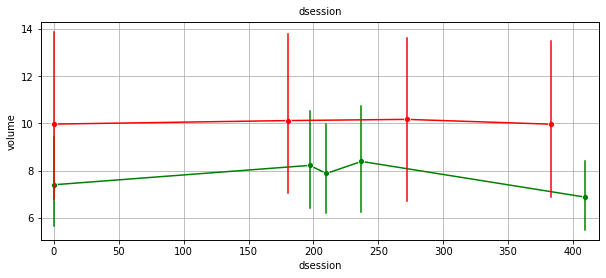

In [108]:
region = 'Left Lateral Ventricle'

fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax2 = ax.twiny()

sns.lineplot(x='dsession', 
             y='volume', 
             data=df[(df.group=='astronaut') & (df.region==region)], 
             ax=ax, 
             color='green', 
             marker='o',
             err_style='bars')

sns.lineplot(x='dsession', 
             y='volume', 
             data=df[(df.group=='control') & (df.region==region)],
             ax=ax2, 
             color='red', 
             marker='o',
             err_style='bars')

#ax.set_ylim([0.4, 0.9])
#ax2.set_ylim([0.4, 0.9])
ax.set_xlim([-10, 420])
ax2.set_xlim([-10, 420])
ax2.set_xticks([])

ax.grid(True)

In [106]:
a['Rnames']

array([[array(['3rd Ventricle'], dtype='<U13')],
       [array(['4th Ventricle'], dtype='<U13')],
       [array(['Right Accumbens Area'], dtype='<U20')],
       [array(['Left Accumbens Area'], dtype='<U19')],
       [array(['Right Amygdala'], dtype='<U14')],
       [array(['Left Amygdala'], dtype='<U13')],
       [array(['Brain Stem'], dtype='<U10')],
       [array(['Right Caudate'], dtype='<U13')],
       [array(['Left Caudate'], dtype='<U12')],
       [array(['Right Cerebellum Exterior'], dtype='<U25')],
       [array(['Left Cerebellum Exterior'], dtype='<U24')],
       [array(['Right Cerebellum White Matter'], dtype='<U29')],
       [array(['Left Cerebellum White Matter'], dtype='<U28')],
       [array(['Right Cerebral White Matter'], dtype='<U27')],
       [array(['Left Cerebral White Matter'], dtype='<U26')],
       [array(['CSF'], dtype='<U3')],
       [array(['Right Hippocampus'], dtype='<U17')],
       [array(['Left Hippocampus'], dtype='<U16')],
       [array(['Right Inf Lat V